# Assignment 1
## Question `1` (K-Nearest Neighbour)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

### Instructions:
1.   Assignment must be implemented using python notebook only (Colab , VsCode , Jupyter etc.)
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for algorithms as well (sklearn etc). You are not however allowed to directly use classifier models.
3.   The performance of the model will hold weightage but you will also be graded largely for data preprocessing steps , explanations , feature selection for vectors etc.
4.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

### The Dataset
The dataset is avaible in the zip file which is a collection of *11099 tweets*. The data will be in the form of a csv file. The ground truth is also given in the zip file which corresponds to whether a tweet was popular or not. Since the task involves selecting features yourself to vectorize a tweet , we suggest some data analysis of the columns you consider important.
<br><br>

### The Task
You have to build a classifier which can predict the popularity of the tweet, i.e , if the tweet was popular or not. You are required to use **KNN** algorithm to build the classifier and cannot use any inbuilt classifier. All columns are supposed to be analyzed , filtered and preprocessed to determine its importance as a feature in the vector for every tweet (Not every column will be useful).<br>
The Data contains the **raw text of the tweet**(in the text column) as well as other **meta data** like likes count , user followers count. Note that it might be useful to **create new columns** with useful information. For example, *number of hashtags* might be useful but is not directly present as a column.<br>
There are 3 main sub parts:
1. *Vectorize tweets using only meta data* - likes , user followers count , and other created data
2. *Vectorize tweets using only it's text*. This segment will require NLP techniques to clean the text and extract a vector using a BoW model. Here is a useful link for the same - [Tf-Idf](https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d). Since these vectors will be very large , we recommend reducing their dimensinality (~10 - 25). Hint: [Dimentionality Reduction](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491). Please note that for this also you are allowed to use libraries.

3. *Combining the vectors from above two techinques to create one bigger vector*
<br>


Using KNN on these vectors build a classifier to predict the popularity of the tweet and report accuracies on each of the three methods as well as analysis. You can use sklearn's Nearest Neighbors and need not write KNN from scratch. (However you cannot use the classifier directly). You are expected to try the classifier for different number of neighbors and identify the optimal K value.

## Import necessary libraries

In [1]:
import pandas as pd
from sklearn import *
import nltk
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectPercentile, chi2
from scipy.stats import mode
import numpy as np
import matplotlib as mp
from sklearn.model_selection import train_test_split
import json
import io
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

## Load and display the data

In [2]:
#your code here
pdDf1 = pd.read_csv('ground_truth.csv')
df = pd.read_csv('Tweets.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   created_at             11099 non-null  object 
 1   id                     11099 non-null  float64
 2   id_str                 11099 non-null  float64
 3   text                   11099 non-null  object 
 4   truncated              11099 non-null  bool   
 5   entities               11099 non-null  object 
 6   metadata               11099 non-null  object 
 7   source                 11099 non-null  object 
 8   is_quote_status        11099 non-null  bool   
 9   retweet_count          11099 non-null  int64  
 10  favorite_count         11099 non-null  int64  
 11  lang                   11099 non-null  object 
 12  user_name              11099 non-null  object 
 13  user_screen_name       11099 non-null  object 
 14  user_followers_count   11099 non-null  int64  
 15  us

## Exploratory Data Analysis
*This is an ungraded section but is recommended to get a good grasp on the dataset*

In [3]:
# your code here

## Part-1
*Vectorize tweets using only meta data*

In [4]:
def get_features():
  """
  Funtion to return a matrix of dimensions (number of tweets, number of chosen features)
  Input parameters to this funcion are to be chosen as per requirement (Example: Loaded dataframe of the dataset) 
  """

  # your code here
  df = pd.read_csv('Tweets.csv')
  df1 = df
  df1.drop(['created_at', 'id','is_quote_status', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'lang', 'user_name', 'user_screen_name', 'user_verified', 'user_created_at'], axis=1, inplace=True)
  return df1

Perform KNN using the vector obtained from get_features() function. Following are the steps to be followed:
1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values. 

In [5]:
class K_Nearest_Neighbors_Classifier() : 
      
    def __init__( self, K ) :
          
        self.K = K
          
    # Function to store training set
          
    def fit( self, X_train, Y_train ) :
          
        self.X_train = X_train
          
        self.Y_train = Y_train
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X_train.shape
      
    # Function for prediction
          
    def predict( self, X_test ) :
          
        self.X_test = X_test
          
        # no_of_test_examples, no_of_features
          
        self.m_test, self.n = X_test.shape
          
        # initialize Y_predict
          
        Y_predict = np.zeros( self.m_test )
          
        for i in range( self.m_test ) :
              
            x = self.X_test[i]
              
            # find the K nearest neighbors from current test example
              
            neighbors = np.zeros( self.K )
              
            neighbors = self.find_neighbors( x )
              
            # most frequent class in K neighbors
              
            Y_predict[i] = mode( neighbors )[0][0]    
              
        return Y_predict
      
    # Function to find the K nearest neighbors to current test example
            
    def find_neighbors( self, x ) :
          
        # calculate all the euclidean distances between current 
        # test example x and training set X_train
          
        euclidean_distances = np.zeros( self.m )
          
        for i in range( self.m ) :
              
            d = self.euclidean( x, self.X_train[i] )
              
            euclidean_distances[i] = d
          
        # sort Y_train according to euclidean_distance_array and 
        # store into Y_train_sorted
          
        inds = euclidean_distances.argsort()
          
        Y_train_sorted = self.Y_train[inds]
          
        return Y_train_sorted[:self.K]
      
    # Function to calculate euclidean distance
              
    def euclidean( self, x, x_train ) :
          
        return np.sqrt( np.sum( np.square( x - x_train ) ) )

In [6]:
df = get_features()
df=pd.DataFrame(preprocessing.normalize(df,norm='l2', axis=1))
df

,0,1,2,3,4,5,6
0,0.002485,0.0,0.003364,0.005805,0.000154,0.725275,0.688422
1,0.067276,0.0,0.008891,0.004354,0.000137,0.075780,0.994803
2,0.548672,0.0,0.037360,0.036041,0.000147,0.794952,0.253605
3,0.001383,0.0,0.334497,0.335741,0.000553,0.828706,0.297715
4,0.595977,0.0,0.007395,0.017004,0.000165,0.148017,0.789024
...,...,...,...,...,...,...,...
11094,0.000063,0.0,0.010097,0.017034,0.000088,0.996459,0.081719
11095,0.836143,0.0,0.042739,0.059675,0.001195,0.202137,0.504595
11096,0.000000,0.0,0.031622,0.022019,0.000000,0.021082,0.999035
11097,0.000862,0.0,0.024187,0.011638,0.000383,0.758123,0.651558


In [7]:
# your code here
X = df.iloc[:,:].values
Y = pdDf1.iloc[:,-1:].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0 )
model = K_Nearest_Neighbors_Classifier( K = 3 )
model.fit( X_train, Y_train )
model1 = KNeighborsClassifier( n_neighbors = 3 )
model1.fit( X_train, Y_train )
Y_pred = model.predict( X_test )
Y_pred1 = model1.predict( X_test )
correctly_classified = 0
correctly_classified1 = 0
count = 0
for count in range( np.size( Y_pred ) ) :
    if Y_test[count] == Y_pred[count] :
        correctly_classified = correctly_classified + 1
    if Y_test[count] == Y_pred1[count] :
        correctly_classified1 = correctly_classified1 + 1
    count = count + 1
print( "Accuracy on test set by our model       :  ", (correctly_classified / count ) * 100 )
print( "Accuracy on test set by sklearn model   :  ", (correctly_classified1 / count ) * 100 )

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy on test set by our model       :   93.86486486486486
Accuracy on test set by sklearn model   :   93.86486486486486


In [8]:
k_val = [2,3,5,8,11,15]
accu = []
for i in k_val:
  model = K_Nearest_Neighbors_Classifier( K = i )
  model.fit( X_train, Y_train )
  Y_pred = model.predict( X_test )
  correctly_classified = 0
  count = 0
  for count in range( np.size( Y_pred ) ) :
      if Y_test[count] == Y_pred[count] :
          correctly_classified = correctly_classified + 1
      count = count + 1
  print( "Accuracy on test set by our model       :  ", (correctly_classified / count ) * 100 )
  accu.append((correctly_classified / count ) * 100)
print(accu)

Accuracy on test set by our model       :   93.43243243243244
Accuracy on test set by our model       :   93.86486486486486
Accuracy on test set by our model       :   94.21621621621622
Accuracy on test set by our model       :   94.1891891891892
Accuracy on test set by our model       :   94.48648648648648
Accuracy on test set by our model       :   94.72972972972973
[93.43243243243244, 93.86486486486486, 94.21621621621622, 94.1891891891892, 94.48648648648648, 94.72972972972973]


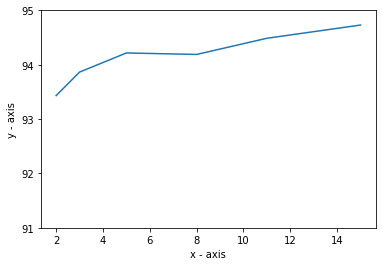

In [9]:
import matplotlib.pyplot as plt 
plt.plot(k_val, accu) 
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
plt.yticks(list(range(91, 96, 1)))
    
# function to show the plot 
plt.show()

## Part-2
Vectorize tweets based on the text. More details and reference links can be checked on the Tasks list in the start of the notebook

In [32]:
import re
import pandas as pd

def remove_usernames_links(text):
    text = re.sub('@[^\s]+','',str(text))
    text = re.sub('http[^\s]+','',str(text))
    text = re.sub('#(\w+)','',str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', str(text))
    # remove extra symbols
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # remove extra spaces
    text = re.sub(' +', ' ', text)
    return text

In [33]:
nltk.download('stopwords')
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:

nltk.download('wordnet')
nltk.download('omw-1.4')
def tweet_vectoriser():
  """
  Funtion to return a matrix of dimensions (number of tweets, number of features extracted per tweet)
  Following are the steps for be followed:
    1. Remove links, tags and hashtags from each tweet.
    2. Apply TF-IDF on the tweets to extract a vector. 
    3. Perform dimensionality reduction on the obtained vector. 
  Input parameters to this funcion are to be chosen as per requirement (Example: Array of tweets) 
  """
  # your code here
  df3 = pd.read_csv('Tweets.csv')

  df3['text'] = df3['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
  df3['text'] = df3['text'].apply(remove_usernames_links)
  df3['text'] = df3['text'].str.replace('\W', ' ', regex=True)
  df3['text'] = df3['text'].str.replace('\d+', ' ', regex=True)
  df3['text'] = df3['text'].str.replace('RT', '', regex=True)
  # remove all single characters
  # print(df3)
  df3['text'] = df3['text'].apply(remove_usernames_links)
  return df3
df4 = tweet_vectoriser()
df5 = df4["text"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
df5


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-35-73de83afceab>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df3['text'] = df3['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')


0        th u circuit court appeal upheld lower court r...
1               world enough superheroes watch new trailer
2                  teacher v student match amp one teacher
3        someone office actually responded netflix twee...
4        starbucks asking soy milk man behind trying ma...
                               ...                        
11094    following tabitha johnson green georgia come s...
11095    exactly donald trump supposed press openly pos...
11096    paradoxically good intention may stand way cap...
11097    le day go international blockchain congress wa...
11098              nature human wired connectedness pisces
Name: text, Length: 11099, dtype: object

Perform KNN using the vector obtained from tweet_vectoriser() function. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [36]:
from sklearn.decomposition import TruncatedSVD
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn import *
## Count (classic BoW)
vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))

## Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))
corpus = df5
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

X = df5

vectorizer = TfidfVectorizer()
X_ = vectorizer.fit_transform(df5)
vectorizer.get_feature_names_out()

X1  = TruncatedSVD(n_components=20).fit_transform(X_train)

tt = pd.DataFrame(X1)
tt=pd.DataFrame(preprocessing.normalize(tt,norm='l2', axis=1))
tt.head()
tt.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000
mean,0.093331,0.124199,0.173210,-0.444921,-0.127136,-0.018164,-0.006885,-0.027985,-0.025748,-0.050781,-0.089601,-0.030512,-0.007871,0.008393,0.008527,0.013694,0.051450,-0.070298,0.008964,0.058147
std,0.150816,0.139505,0.114049,0.209995,0.110389,0.120962,0.111883,0.146080,0.179655,0.214992,0.211813,0.207789,0.207185,0.207558,0.160083,0.204009,0.207708,0.244484,0.168590,0.286063
min,0.000000,-0.045662,-0.131932,-0.855508,-0.258905,-0.138970,-0.246359,-0.203698,-0.456931,-0.514733,-0.504415,-0.568793,-0.696188,-0.698950,-0.481290,-0.545061,-0.484382,-0.739543,-0.534075,-0.848042
25%,0.037902,0.065643,0.106789,-0.619167,-0.188602,-0.055477,-0.038990,-0.092898,-0.106859,-0.179633,-0.221638,-0.157857,-0.120115,-0.119165,-0.068049,-0.092956,-0.070409,-0.244501,-0.068229,-0.098539
50%,0.055994,0.097829,0.162995,-0.448068,-0.135944,-0.037620,-0.016383,-0.058510,-0.046634,-0.078026,-0.122676,-0.047141,-0.017848,0.010286,-0.005272,0.001255,0.024021,-0.058519,0.000300,0.035172
75%,0.079779,0.135318,0.229124,-0.303600,-0.092125,-0.015913,0.006863,-0.015473,0.008779,0.002923,-0.009889,0.048592,0.071359,0.129785,0.052935,0.088196,0.173829,0.094088,0.081734,0.219691
max,0.993523,0.988908,0.943631,0.343408,0.957711,0.992339,0.968466,0.954366,0.826091,0.901331,0.817094,0.874623,0.811569,0.622888,0.945299,0.869135,0.777595,0.781402,0.974753,0.818313


In [37]:
Y = pd.read_csv('ground_truth.csv')
X = tt.iloc[:,:].values
Y = Y.iloc[:,:].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=0)
model = K_Nearest_Neighbors_Classifier( K = 3 )
model.fit( x_train, y_train )
print(x_train)
Y_pred = model.predict( x_test )
correctly_classified = 0
count = 0
for count in range( np.size( Y_pred ) ) :
    if y_test[count] == Y_pred[count] :
        correctly_classified = correctly_classified + 1
    count = count + 1
print( "Accuracy on test set by our model       :  ", (correctly_classified / count ) * 100 )

[[ 0.30746741  0.04718847  0.09062731 ... -0.48049214  0.12510923
   0.00104867]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.07610531  0.13251768  0.21242704 ... -0.30441274  0.08781053
   0.49845044]
 ...
 [ 0.05349729  0.11598742  0.18200227 ... -0.14324336  0.13741769
  -0.37789559]
 [ 0.0413751   0.07524687  0.11556815 ... -0.38713374 -0.01259371
   0.34992996]
 [ 0.06942511  0.13166526  0.23463248 ... -0.40837596 -0.02428911
   0.09191248]]
Accuracy on test set by our model       :   92.001092001092


In [38]:
k_val = [2,3,5,8,11,15]
accu = []
for i in k_val:
  model = K_Nearest_Neighbors_Classifier( K = i )
  model.fit( x_train, y_train )
  Y_pred = model.predict( x_test )
  correctly_classified = 0
  count = 0
  for count in range( np.size( Y_pred ) ) :
      if y_test[count] == Y_pred[count] :
          correctly_classified = correctly_classified + 1
      count = count + 1
  print( "Accuracy on test set by our model       :  ", (correctly_classified / count ) * 100 )
  accu.append((correctly_classified / count ) * 100)
print(accu)

Accuracy on test set by our model       :   92.57439257439258
Accuracy on test set by our model       :   92.001092001092
Accuracy on test set by our model       :   92.35599235599236
Accuracy on test set by our model       :   92.71089271089271
Accuracy on test set by our model       :   92.71089271089271
Accuracy on test set by our model       :   92.54709254709255
[92.57439257439258, 92.001092001092, 92.35599235599236, 92.71089271089271, 92.71089271089271, 92.54709254709255]


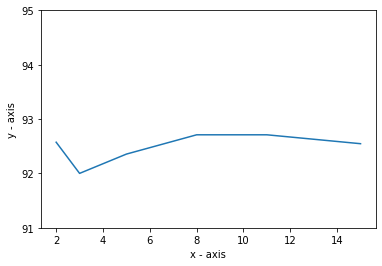

In [39]:
import matplotlib.pyplot as plt 
plt.plot(k_val, accu) 
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
plt.yticks(list(range(91, 96, 1)))
    
# function to show the plot 
plt.show() 

## Part-3
### Subpart-1

Combine both the vectors obtained from the tweet_vectoriser() and get_features()

In [30]:
# your code here
result = pd.concat([df, tt], axis=1, join='inner')
display(result)
result=pd.DataFrame(preprocessing.normalize(result,norm='l2', axis=1))
result.head()
result.describe()

,0,1,2,3,4,5,6,0,1,2,...,10,11,12,13,14,15,16,17,18,19
0,0.002485,0.0,0.003364,0.005805,0.000154,0.725275,0.688422,0.068668,0.129351,0.237241,...,-0.070641,-0.431199,0.184534,0.042400,-0.078407,5.325931e-03,0.067564,-0.080841,0.046326,0.231259
1,0.067276,0.0,0.008891,0.004354,0.000137,0.075780,0.994803,0.993697,-0.045691,-0.049375,...,0.004368,-0.008722,-0.004211,-0.003447,-0.004905,3.861003e-03,0.005220,0.000042,-0.002916,-0.001509
2,0.548672,0.0,0.037360,0.036041,0.000147,0.794952,0.253605,0.038057,0.072013,0.309021,...,0.014204,-0.127968,0.554919,0.179844,-0.020220,-4.829201e-01,-0.211944,-0.027325,0.205905,-0.086977
3,0.001383,0.0,0.334497,0.335741,0.000553,0.828706,0.297715,0.065625,0.113276,0.193700,...,0.158905,-0.071769,-0.098479,0.080882,-0.127455,1.007503e-01,-0.038203,-0.015459,-0.183369,-0.281545
4,0.595977,0.0,0.007395,0.017004,0.000165,0.148017,0.789024,0.019214,0.037762,0.062119,...,-0.094924,-0.011398,-0.185560,-0.290936,0.498770,-1.833064e-01,0.300630,0.284944,-0.527178,0.304248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,0.000063,0.0,0.010097,0.017034,0.000088,0.996459,0.081719,0.096851,0.176407,0.301197,...,-0.058503,0.092512,0.301115,-0.036082,-0.004182,-2.068319e-01,0.223267,-0.097604,-0.093977,-0.006318
11095,0.836143,0.0,0.042739,0.059675,0.001195,0.202137,0.504595,0.021603,0.051869,0.091339,...,-0.193715,-0.222365,0.067590,0.044052,0.009915,5.059821e-01,-0.029063,-0.598914,0.041930,-0.427890
11096,0.000000,0.0,0.031622,0.022019,0.000000,0.021082,0.999035,0.024642,0.978614,-0.131957,...,0.010659,0.000940,0.006846,0.004173,-0.000875,-1.610817e-03,0.004486,0.001506,0.000732,0.008476
11097,0.000862,0.0,0.024187,0.011638,0.000383,0.758123,0.651558,0.364847,0.073480,0.121394,...,0.357761,-0.126029,-0.149759,0.026820,-0.026737,-6.518180e-03,-0.041966,0.012479,-0.055922,-0.071057


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
count,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,...,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000,11099.000000
mean,0.070926,0.000017,0.057656,0.066094,0.001004,0.339321,0.471003,0.065086,0.088312,0.122953,...,-0.073310,-0.033474,-0.002178,-0.006400,0.003494,0.026620,0.031007,-0.055252,-0.018555,-0.004071
std,0.173427,0.001233,0.109138,0.115426,0.004073,0.237989,0.212995,0.103099,0.098461,0.080155,...,0.161239,0.143285,0.153085,0.144392,0.117448,0.143537,0.135278,0.160462,0.163424,0.177003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000081,-0.000106,-0.032515,-0.093308,...,-0.430949,-0.374117,-0.370270,-0.458999,-0.255432,-0.410107,-0.395143,-0.539314,-0.581776,-0.577860
25%,0.000000,0.000000,0.006694,0.007635,0.000000,0.106040,0.308292,0.027262,0.046659,0.075621,...,-0.191486,-0.132084,-0.095308,-0.094799,-0.066572,-0.047620,-0.056609,-0.165029,-0.114923,-0.099542
50%,0.000499,0.000000,0.017291,0.021205,0.000111,0.348045,0.512735,0.039671,0.070122,0.117457,...,-0.103347,-0.047880,-0.013142,-0.006054,-0.003777,0.014169,0.015552,-0.045663,-0.000637,-0.001471
75%,0.020095,0.000000,0.050367,0.062248,0.000513,0.558246,0.669910,0.056308,0.095804,0.162848,...,0.002997,0.022811,0.060272,0.068199,0.045567,0.103340,0.097766,0.044468,0.081253,0.086469
max,0.999975,0.129099,0.737019,0.788336,0.163261,0.993574,0.999998,0.703679,0.699123,0.659512,...,0.520785,0.616005,0.581892,0.494132,0.616834,0.506259,0.600890,0.443523,0.545708,0.571300


Perform KNN using the vector obtained in the previous step. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [31]:
X = result.iloc[:,:].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=0)
model = K_Nearest_Neighbors_Classifier( K = 3 )
model.fit( x_train, y_train )
Y_pred = model.predict( x_test )
correctly_classified = 0
count = 0
for count in range( np.size( Y_pred ) ) :
    if y_test[count] == Y_pred[count] :
        correctly_classified = correctly_classified + 1
    count = count + 1
print( "Accuracy on test set by our model       :  ", (correctly_classified / count ) * 100 )

Accuracy on test set by our model       :   93.72099372099372


In [28]:
k_val = [2,3,5,8,11,15]
accu = []
for i in k_val:
  model = K_Nearest_Neighbors_Classifier( K = i )
  model.fit( x_train, y_train )
  Y_pred = model.predict( x_test )
  correctly_classified = 0
  count = 0
  for count in range( np.size( Y_pred ) ) :
      if y_test[count] == Y_pred[count] :
          correctly_classified = correctly_classified + 1
      count = count + 1
  print( "Accuracy on test set by our model       :  ", (correctly_classified / count ) * 100 )
  accu.append((correctly_classified / count ) * 100)
print(accu)

Accuracy on test set by our model       :   93.52989352989353
Accuracy on test set by our model       :   93.72099372099372
Accuracy on test set by our model       :   93.3933933933934
Accuracy on test set by our model       :   93.31149331149331
Accuracy on test set by our model       :   93.44799344799345
Accuracy on test set by our model       :   93.42069342069342
[93.52989352989353, 93.72099372099372, 93.3933933933934, 93.31149331149331, 93.44799344799345, 93.42069342069342]


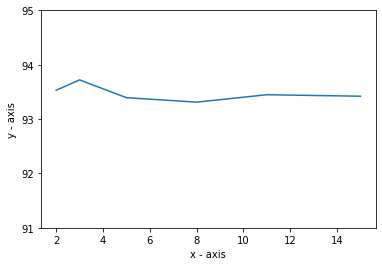

In [29]:
import matplotlib.pyplot as plt 
plt.plot(k_val, accu) 
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
plt.yticks(list(range(91, 96, 1)))
    
# function to show the plot 
plt.show() 

### Subpart-2

Explain the differences between the accuracies obtained in each part above based on the features used.

In [20]:
# your code here

In First part we considered only integeral values

Accuracy Obtained : 94.72972972972973

In Second Part we considered only text field 

Accuracy Obtained : 92.71089271089271

In Third part we took the combination of both

Accuracy Obtained : 93.72099372099372